In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [6]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

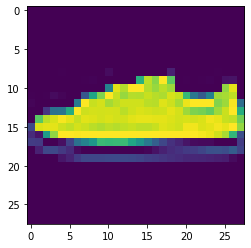

In [7]:
# lets see what the images look like

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [8]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [9]:

cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

C:\Users\suren\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Epoch 1/10
94/94 [==============================] - 11s 112ms/step - loss: 0.8489 - accuracy: 0.7141 - val_loss: 0.4856 - val_accuracy: 0.8315
Epoch 2/10
94/94 [==============================] - 10s 110ms/step - loss: 0.4466 - accuracy: 0.8430 - val_loss: 0.3929 - val_accuracy: 0.8663
Epoch 3/10
94/94 [==============================] - 11s 117ms/step - loss: 0.3871 - accuracy: 0.8656 - val_loss: 0.3656 - val_accuracy: 0.8688
Epoch 4/10
94/94 [==============================] - 12s 123ms/step - loss: 0.3569 - accuracy: 0.8739 - val_loss: 0.3377 - val_accuracy: 0.8833
Epoch 5/10
94/94 [==============================] - 12s 126ms/step - loss: 0.3344 - accuracy: 0.8828 - val_loss: 0.3196 - val_accuracy: 0.8886
Epoch 6/10
94/94 [==============================] - 12s 126ms/step - loss: 0.3187 - accuracy: 0.8874 - val_loss: 0.3086 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 12s 127ms/step - loss: 0.3080 - accuracy: 0.8917 - val_loss: 0.3037 - val_accuracy: 0.8962

In [12]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2864
 test acc: 0.8995


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

In [5]:
# split the training and testing data into X (image) and Y (label) arrays

train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [6]:
# reshape the data

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [7]:

# our 3 models 

name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [8]:
# the model summaries

for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________

In [9]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
94/94 [==============================] - 11s 114ms/step - loss: 0.7627 - accuracy: 0.7499 - val_loss: 0.4580 - val_accuracy: 0.8365
Epoch 2/50
94/94 [==============================] - 11s 122ms/step - loss: 0.4285 - accuracy: 0.8484 - val_loss: 0.3987 - val_accuracy: 0.8591
Epoch 3/50
94/94 [==============================] - 12s 130ms/step - loss: 0.3758 - accuracy: 0.8680 - val_loss: 0.3499 - val_accuracy: 0.8777
Epoch 4/50
94/94 [==============================] - 12s 132ms/step - loss: 0.3461 - accuracy: 0.8778 - val_loss: 0.3328 - val_accuracy: 0.8825
Epoch 5/50
94/94 [==============================] - 13s 134ms/step - loss: 0.3296 - accuracy: 0.8836 - val_loss: 0.3141 - val_accuracy: 0.8899
Epoch 6/50
94/94 [==============================] - 13s 139ms/step - loss: 0.3110 - accuracy: 0.8909 - val_loss: 0.3052 - val_accuracy: 0.8938
Epoch 7/50
94/94 [==============================] - 13s 141ms/step - loss: 0.2959 - accuracy: 0.8967 - val_loss: 0.2987 - val_accuracy: 0.8951

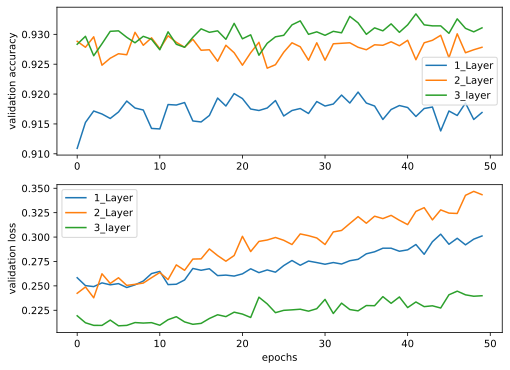

In [12]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()